In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams

In [3]:
df = pd.read_excel("Sample - Superstore.xls")
Furniture = df.loc[df['Category'] == 'Furniture']

In [4]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount','Sales']
Furniture.drop(cols, axis=1, inplace=True)
Furniture = Furniture.sort_values('Order Date')
Furniture.isnull().sum()

Order Date    0
Profit        0
dtype: int64

In [7]:
Furniture  = Furniture .groupby('Order Date')['Profit'].sum().reset_index()

In [9]:
Furniture = Furniture.set_index('Order Date')
Furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [10]:
y = Furniture['Profit'].resample('MS').mean()

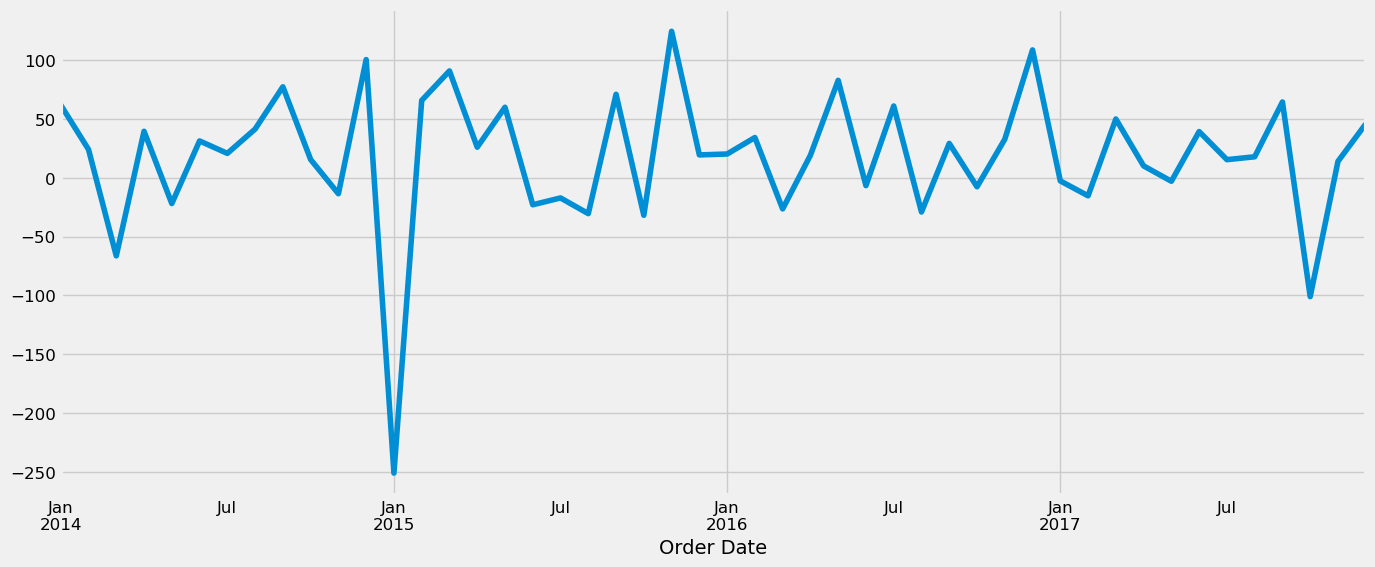

In [11]:
y.plot(figsize=(15, 6))
plt.show()

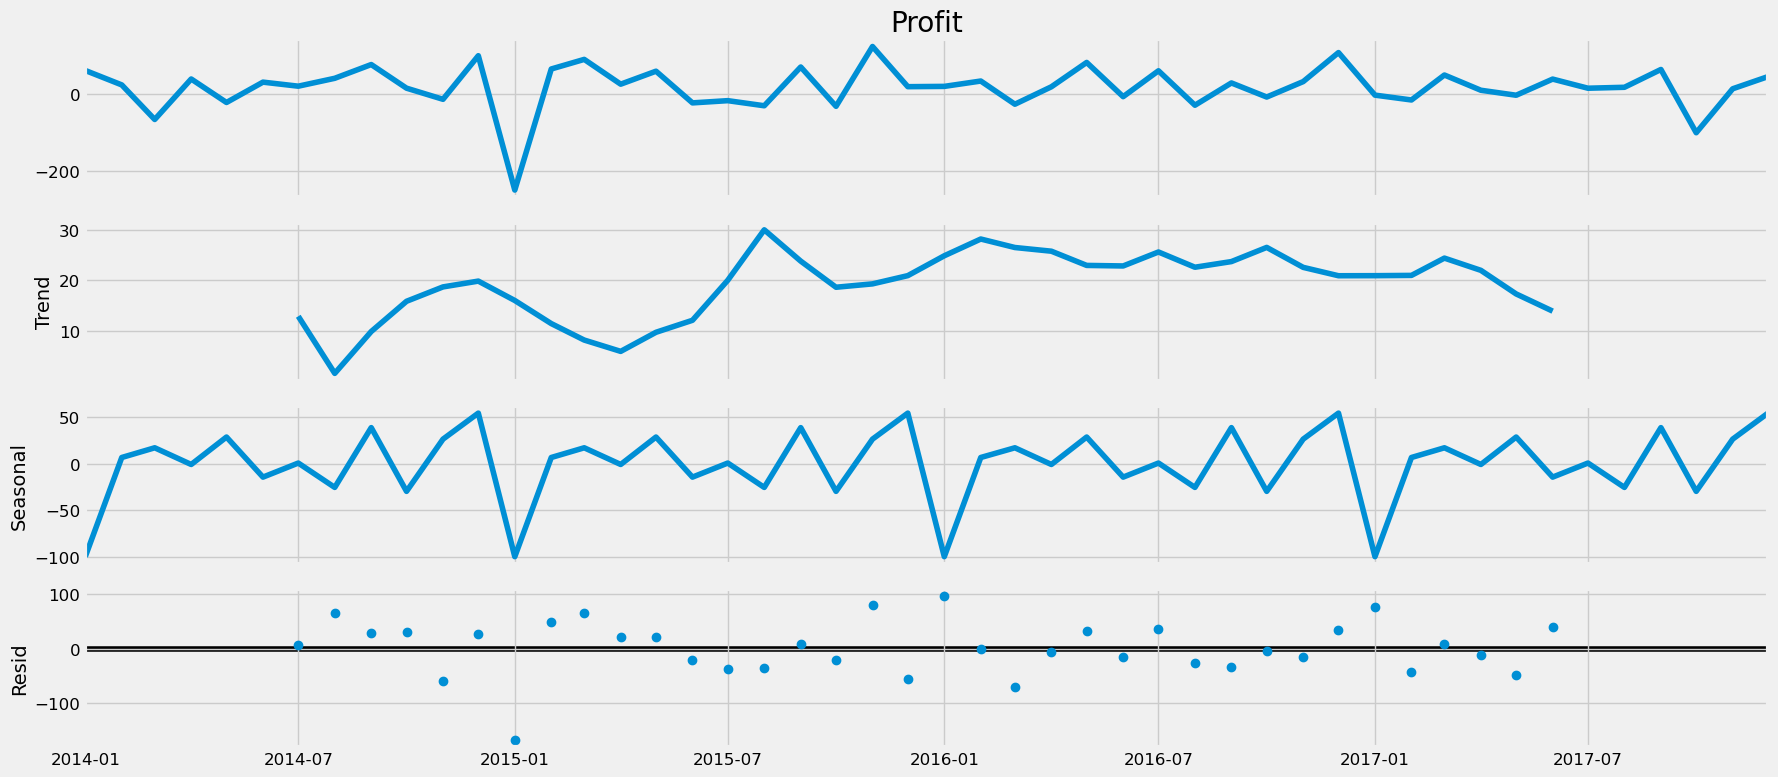

In [12]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:523.1706205585396
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1371.3938245559102
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:407.7629219834047


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:245.37292517517884
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:407.0038532643428


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1128.0913219176737
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:262.85960560776346
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:248.8504257264365
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:512.3948944514054


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2507.248093418276
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:393.53433366465293
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:236.9958231602961
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:408.08323729365617


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2550.485421370589
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:264.64461731911
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:238.99403600200938
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:554.9149492574671
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1342.8000100679571
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:428.6107427871337
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:249.84629404378595
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:417.55612339909004
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1455.2122476795598


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:268.62520327115175
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:251.83763509202436
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:503.36456193468246


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2509.122793454772
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:387.38105872509107
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:229.585714002871
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:382.99867103527777
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1518.909890102547
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:256.38863883911165


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:232.6327996018814
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:522.3888951841286
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1531.601492561469
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:406.9296191566566


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:247.21002454195875
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:378.7552598345099


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1531.1818691689198
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:248.6169832663004
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:250.50246904865523
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:513.9020867493463


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1499.684982948017
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:392.95730215974004
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:237.3435996030559
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:380.57552921952635


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1564.133746231497
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:249.5431049241975
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:240.0842580152567
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:535.2578466374571
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1382.5455798134328
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:419.2310482130164


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:249.91170087386362
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:385.2367618642096


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1386.6134871651732
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:252.2266474927101
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:251.91050176684888
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:499.10015729787693


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2496.4605886266877
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:385.9088908138351
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:231.15603293055926
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:376.8126842976498


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1733.9973548326839
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:246.7588003109572
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:234.151921555011


In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1691      0.174     -0.970      0.332      -0.511       0.172
ma.L1         -1.0000   8935.305     -0.000      1.000   -1.75e+04    1.75e+04
ar.S.L12      -0.4049      0.142     -2.846      0.004      -0.684      -0.126
ma.S.L12      -1.0000   8935.436     -0.000      1.000   -1.75e+04    1.75e+04
sigma2      2325.4746      3.744    621.061      0.000    2318.136    2332.813


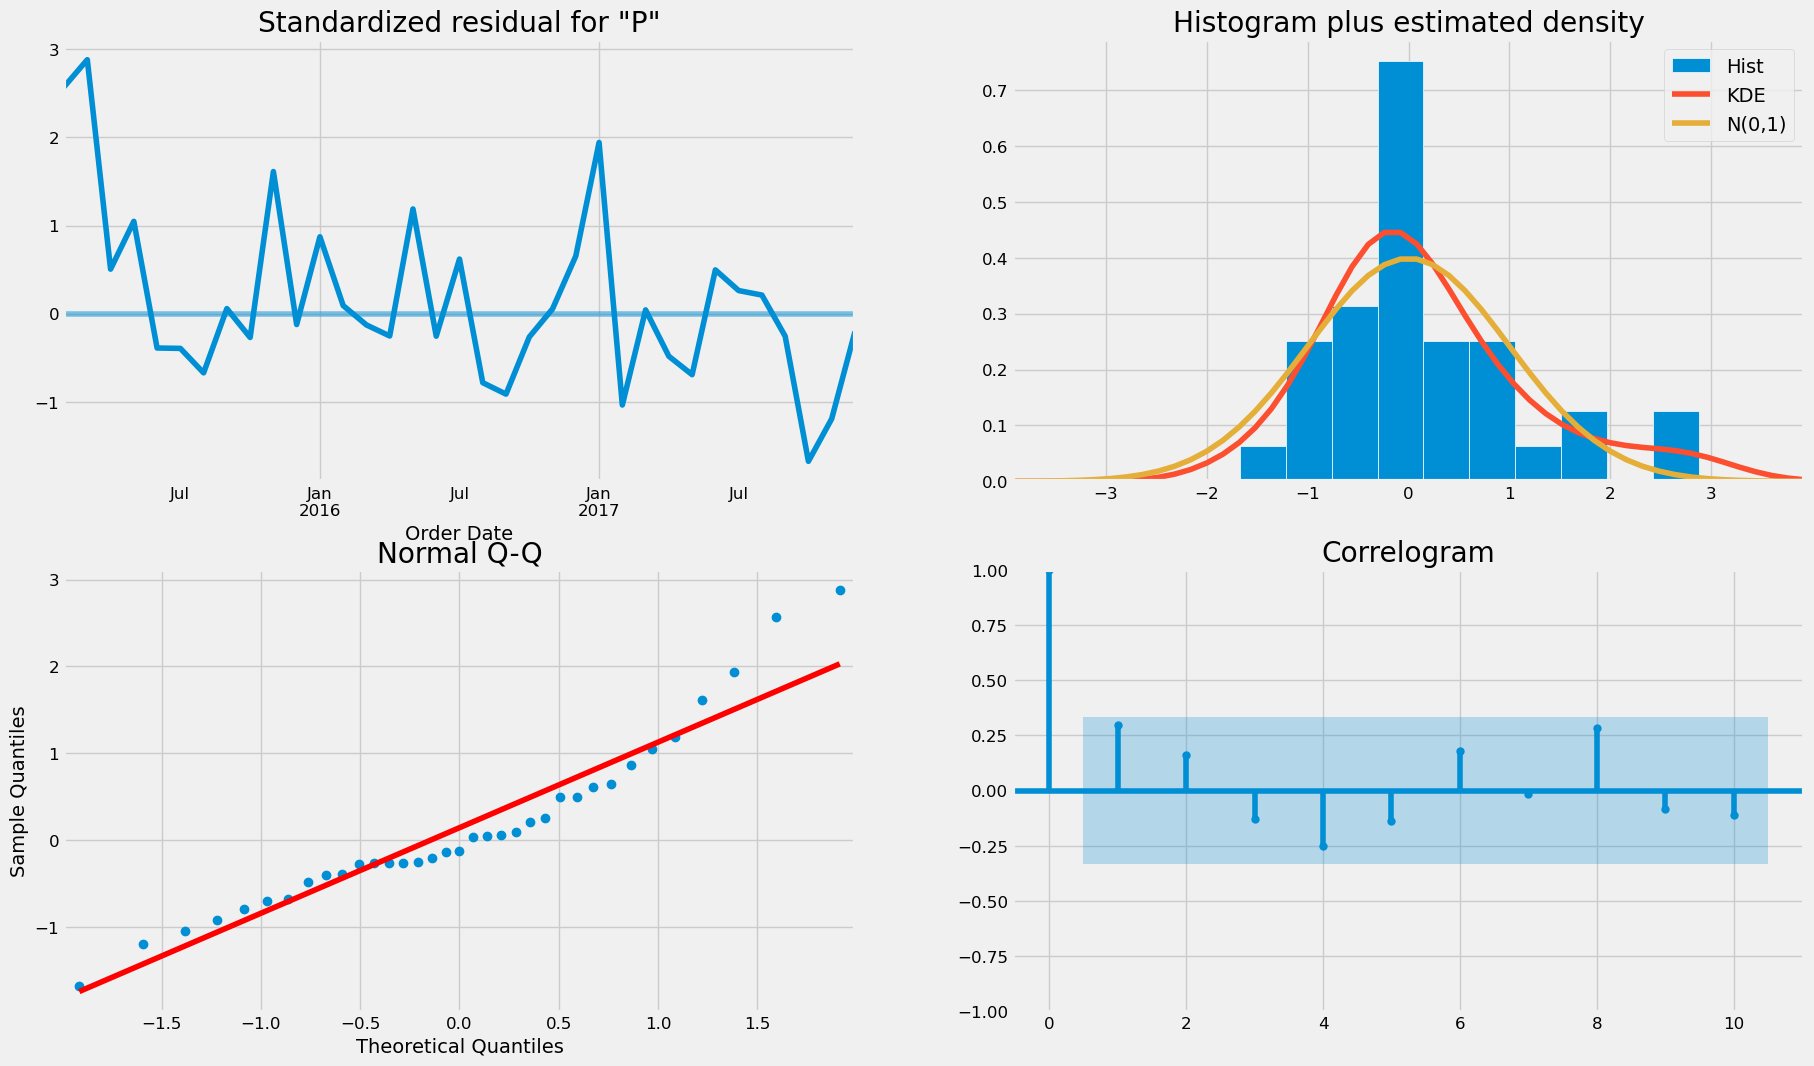

In [16]:
results.plot_diagnostics(figsize=(20, 12))
plt.show()

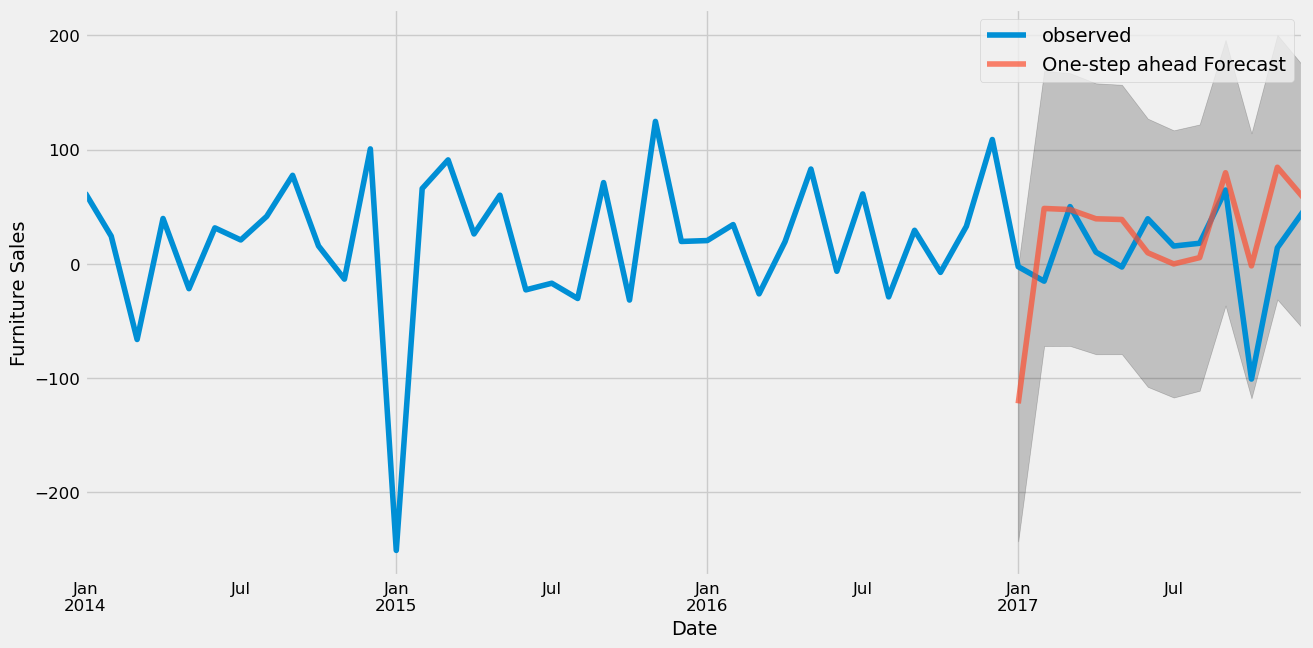

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False) 
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3121.75


In [23]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 55.87


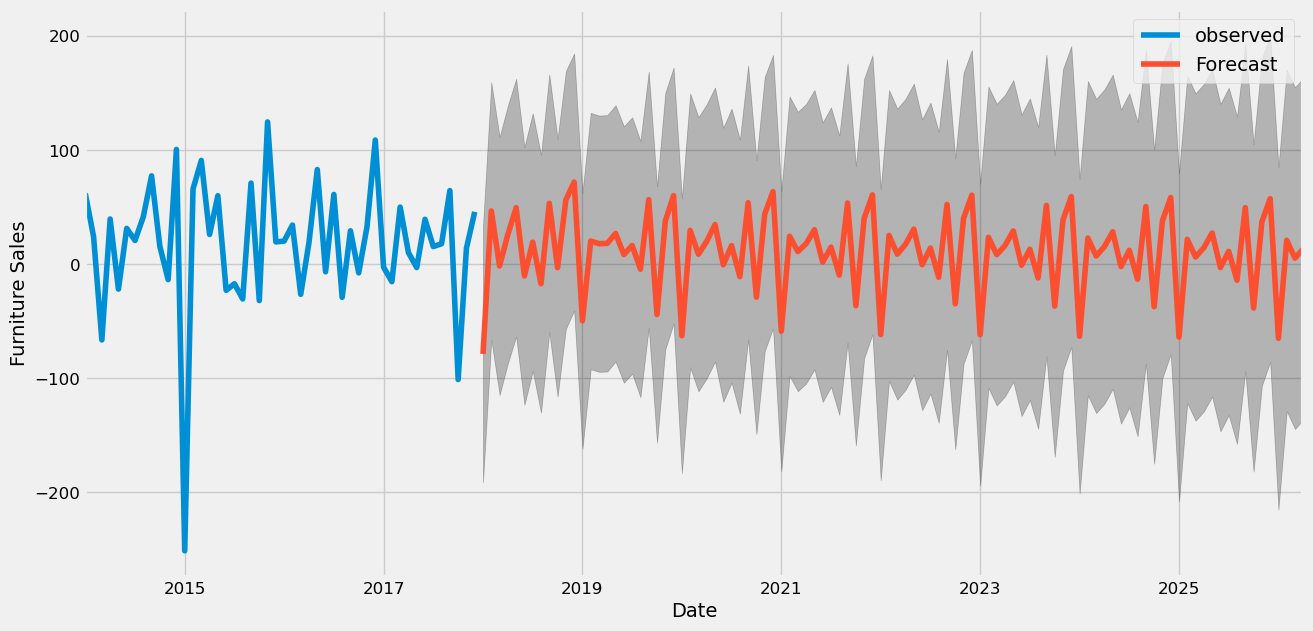

In [24]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()